In [67]:
#Importación de paquetes
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from matplotlib import animation
#from matplotlib import animation
#import time

#Taller 9 - Ecuaciones en Derivadas Parciales
*Métodos Computacionales - Laboratorio*

14-Jul-2015 & 15-Jul-2015

## Ecuación de Onda con Amortiguamiento 8 ✵

1) ✵✵✵ Modifique la solución de la ecuación de onda 2D por diferencias finitas para incluir efectos de amortiguamiento. Determine la ecuación de evolución modificada y escriba el desarrollo algebraico correspondiente.

$$\frac{\partial^2 \psi}{\partial{x}^2} + 2\eta \frac{\partial\psi}{\partial{t}} = \frac{1}{v^2}\frac{\partial^2 \psi}{\partial{t}^2}$$
    
2) ✵ Programe lo anterior y haga una animación de lo que le acontece a una deformación inicial similar a la que hemos utilizado en anteriores ocasiones. Considere una membrana con extremos fijos.

3) ✵✵✵✵ Ahora haga una animación que simule gotas sobre la superficie de una piscina de agua. Extremos fijos. [Aquí](https://github.com/ComputoCienciasUniandes/MetodosComputacionalesLaboratorio/raw/master/2015-V/actividades/talleres/Taller9/pool.mp4) se muestra un ejemplo del resultado esperado donde se usaron los siguientes parámetros:

    # unidades arbitrarias
    xmin=-0.5
    xmax=0.5
    ymin=-0.5
    ymax=0.5
    dt=1.5e-5
    dx=1.0e-2
    v=400.
    eta=1000.
    r=v*dt/dx
    Nt = 900

  **Al terminar la clase del miércoles ejecute `lottery.sh` para saber si su taller va a ser revisado.**


In [34]:
#Defino condiciones del cubo
Nt=900
Nl=100
L=1. # Lado del cubo

tmin=0
tmax=0.0135

xmin=-L/2
xmax=L/2

ymin=-L/2
ymax=L/2

dt=(tmax-tmin)/Nt
dx=(xmax-xmin)/Nl
dy=(ymax-ymin)/Nl

v=400. # m/s
r=v*dt/dx
eta=0.00625

stdev=0.05

In [35]:
#Defino cuadrados a utilizar
xcoords=np.linspace(xmin,xmax,Nl)
ycoords=np.linspace(xmin,xmax,Nl)
tcoords=np.linspace(tmin,tmax,Nt)

xmesh,ymesh=np.meshgrid(xcoords,ycoords)

#Cara de prueba de nueva función amortiguada
prueba = np.zeros((Nt,Nl,Nl))

#Cara de la piscina
piscina = np.zeros((Nt,Nl,Nl))

In [62]:
#Defino condición inicial para cara de prueba
#cara1
x = 0.5/np.random.randint(-9,10)
y = 0.5/np.random.randint(-9,10)

prueba[0] = np.exp(-xmesh**2/(2*stdev**2))*np.exp(-ymesh**2/(2*stdev**2))
prueba[1] = prueba[0]+r**2/2.*(np.roll(prueba[0],1,axis=0)+
                               np.roll(prueba[0],-1,axis=0)+
                               np.roll(prueba[0],1,axis=1)+
                               np.roll(prueba[0],-1,axis=1)-
                               4*prueba[0])
prueba[1,0]=0
prueba[1,-1]=0
prueba[1,:,0]=0
prueba[1,:,-1]=0

prueba[2] = np.exp(-(xmesh - x)**2/(2*stdev**2))*np.exp(-(ymesh - y)**2/(2*stdev**2))

(-0.48999999999999999,
 0.48999999999999999,
 -0.48999999999999999,
 0.48999999999999999)

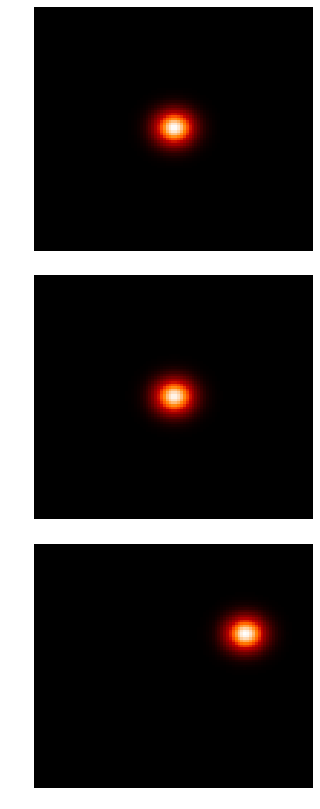

In [63]:
fig = plt.figure(figsize=(5,14))
plt.subplots_adjust(hspace=0.10, wspace=0.00)

plt.subplot(3,1,1)
plt.pcolor(xcoords,ycoords,prueba[0],cmap='gist_heat',vmin=0.,vmax=1.)
plt.xlim(xmin+dx,xmax-dx)
plt.ylim(ymin+dy,ymax-dy)
plt.axis('off')

plt.subplot(3,1,2)
plt.pcolor(xcoords,ycoords,prueba[1],cmap='gist_heat',vmin=0.,vmax=1.)
plt.xlim(xmin+dx,xmax-dx)
plt.ylim(ymin+dy,ymax-dy)
plt.axis('off')

plt.subplot(3,1,3)
plt.pcolor(xcoords,ycoords,prueba[2],cmap='gist_heat',vmin=0.,vmax=1.)
plt.xlim(xmin+dx,xmax-dx)
plt.ylim(ymin+dy,ymax-dy)
plt.axis('off')

#plt.show()

In [5]:
#Los arrays tienen 2 espacios más que el tamaño de cada cara, esto es para guardar la información de la frontera de las
#caras vecinas. Con esta función actualizo la información de las fronteras.
def actualizar_bordes():
    global pcara1
    global ppcara1
    
    global pcara2
    global ppcara2
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    +++++++++++++
    global pcara3
    global ppcara3
    
    global pcara4
    global ppcara4
    
    global pcara5
    global ppcara5
    
    global pcara6
    global ppcara6
    
    ##cara1 tiempo -1
    #arriba
    pcara1[0,1:-1] = pcara3[-2,1:-1]
    #abajo
    pcara1[-1,1:-1] = pcara4[1,1:-1]
    #izquierda
    pcara1[1:-1,0] = pcara5[1:-1,-2]
    #derecha
    pcara1[1:-1,-1] = pcara2[1:-1,1]
    
    ##cara1 tiempo -2
    #arriba
    ppcara1[0,1:-1] = ppcara3[-2,1:-1]
    #abajo
    ppcara1[-1,1:-1] = ppcara4[1,1:-1]
    #izquierda
    ppcara1[1:-1,0] = ppcara5[1:-1,-2]
    #derecha
    ppcara1[1:-1,-1] = ppcara2[1:-1,1]
    
    
    ##cara2 tiempo -1
    #arriba
    pcara2[0,1:-1] = pcara3[1:-1,-2]
    #abajo
    pcara2[-1,1:-1] = pcara4[1:-1,-2]
    #izquierda
    pcara2[1:-1,0] = pcara1[1:-1,-2]
    #derecha
    pcara2[1:-1,-1] = pcara6[1:-1,1]
    
    ##cara2 tiempo -2
    #arriba
    ppcara2[0,1:-1] = pcara3[1:-1,-2]
    #abajo
    ppcara2[-1,1:-1] = ppcara4[1:-1,-2]
    #izquierda
    ppcara2[1:-1,0] = ppcara1[1:-1,-2]
    #derecha
    ppcara2[1:-1,-1] = ppcara6[1:-1,1]
    
    
    ##cara3 tiempo -1
    #arriba
    pcara3[0,1:-1] = pcara6[1,1:-1]
    #abajo
    pcara3[-1,1:-1] = pcara1[1,1:-1]
    #izquierda
    pcara3[1:-1,0] = pcara5[1,1:-1]
    #derecha
    pcara3[1:-1,-1] = pcara2[1,1:-1]
    
    ##cara3 tiempo -2
    #arriba
    ppcara3[0,1:-1] = ppcara6[1,1:-1]
    #abajo
    ppcara3[-1,1:-1] = ppcara1[1,1:-1]
    #izquierda
    ppcara3[1:-1,0] = ppcara5[1,1:-1]
    #derecha
    ppcara3[1:-1,-1] = ppcara2[1,1:-1]
    
    
    ##cara4 tiempo -1
    #arriba
    pcara4[0,1:-1] = pcara1[-2,1:-1]
    #abajo
    pcara4[-1,1:-1] = pcara6[-2,1:-1]
    #izquierda
    pcara4[1:-1,0] = pcara5[-2,1:-1]
    #derecha
    pcara4[1:-1,-1] = pcara2[-2,1:-1]
    
    ##cara4 tiempo -2
    #arriba
    ppcara4[0,1:-1] = ppcara1[-2,1:-1]
    #abajo
    ppcara4[-1,1:-1] = ppcara6[-2,1:-1]
    #izquierda
    ppcara4[1:-1,0] = ppcara5[-2,1:-1]
    #derecha
    ppcara4[1:-1,-1] = ppcara2[-2,1:-1]
    
    
    ##cara5 tiempo -1
    #arriba
    pcara5[0,1:-1] = pcara3[1:-1,1]
    #abajo
    pcara5[-1,1:-1] = pcara4[1:-1,1]
    #izquierda
    pcara5[1:-1,0] = pcara6[1:-1,-2]
    #derecha
    pcara5[1:-1,-1] = pcara1[1:-1,1]
    
    ##cara5 tiempo -2
    #arriba
    ppcara5[0,1:-1] = ppcara3[1:-1,1]
    #abajo
    ppcara5[-1,1:-1] = ppcara4[1:-1,1]
    #izquierda
    ppcara5[1:-1,0] = ppcara6[1:-1,-2]
    #derecha
    ppcara5[1:-1,-1] = ppcara1[1:-1,1]
    
    
    ##cara6 tiempo -1
    #arriba
    pcara6[0,1:-1] = pcara3[1,1:-1]
    #abajo
    pcara6[-1,1:-1] = pcara4[-2,1:-1]
    #izquierda
    pcara6[1:-1,0] = pcara2[1:-1,-2]
    #derecha
    pcara6[1:-1,-1] = pcara1[1:-1,1]
    
    ##cara6 tiempo -2
    #arriba
    ppcara6[0,1:-1] = ppcara3[1,1:-1]
    #abajo
    ppcara6[-1,1:-1] = ppcara4[-2,1:-1]
    #izquierda
    ppcara6[1:-1,0] = ppcara2[1:-1,-2]
    #derecha
    ppcara6[1:-1,-1] = ppcara1[1:-1,1]

In [6]:
def actualizar_caras(i):
    global cara1
    global pcara1
    global ppcara1
    
    global cara2
    global pcara2
    global ppcara2
    
    global cara3
    global pcara3
    global ppcara3
    
    global cara4
    global pcara4
    global ppcara4
    
    global cara5
    global pcara5
    global ppcara5
    
    global cara6
    global pcara6
    global ppcara6
    
    #cara1
    cara1[i] = 2*(1.-2.*r**2)*pcara1 - ppcara1 + r**2*(np.roll(pcara1,1,axis=1)+
                                                    np.roll(pcara1,-1,axis=1)+
                                                    np.roll(pcara1,1,axis=0)+
                                                    np.roll(pcara1,-1,axis=0))
    
    #cara2
    cara2[i] = 2*(1.-2.*r**2)*pcara2 - ppcara2 + r**2*(np.roll(pcara2,1,axis=1)+
                                                    np.roll(pcara2,-1,axis=1)+
                                                    np.roll(pcara2,1,axis=0)+
                                                    np.roll(pcara2,-1,axis=0))
    
    #cara3
    cara3[i] = 2*(1.-2.*r**2)*pcara3 - ppcara3 + r**2*(np.roll(pcara3,1,axis=1)+
                                                    np.roll(pcara3,-1,axis=1)+
                                                    np.roll(pcara3,1,axis=0)+
                                                    np.roll(pcara3,-1,axis=0))
    
    #cara4
    cara4[i] = 2*(1.-2.*r**2)*pcara4 - ppcara4 + r**2*(np.roll(pcara4,1,axis=1)+
                                                    np.roll(pcara4,-1,axis=1)+
                                                    np.roll(pcara4,1,axis=0)+
                                                    np.roll(pcara4,-1,axis=0))
    
    #cara5
    cara5[i] = 2*(1.-2.*r**2)*pcara5 - ppcara5 + r**2*(np.roll(pcara5,1,axis=1)+
                                                    np.roll(pcara5,-1,axis=1)+
                                                    np.roll(pcara5,1,axis=0)+
                                                    np.roll(pcara5,-1,axis=0))
    
    #cara1
    cara6[i] = 2*(1.-2.*r**2)*pcara6 - ppcara6 + r**2*(np.roll(pcara6,1,axis=1)+
                                                    np.roll(pcara6,-1,axis=1)+
                                                    np.roll(pcara6,1,axis=0)+
                                                    np.roll(pcara6,-1,axis=0))

In [7]:
#Simulación
for i in range(2,Nt):
    #Instantes anteriores cara1
    pcara1 = cara1[i-1]
    ppcara1 = cara1[i-2]
    
    #Instantes anteriores cara2
    pcara2 = cara2[i-1]
    ppcara2 = cara2[i-2]
    
    #Instantes anteriores cara3
    pcara3 = cara3[i-1]
    ppcara3 = cara3[i-2]
    
    #Instantes anteriores cara4
    pcara4 = cara4[i-1]
    ppcara4 = cara4[i-2]
    
    #Instantes anteriores cara5
    pcara5 = cara5[i-1]
    ppcara5 = cara5[i-2]
    
    #Instantes anteriores cara6
    pcara6 = cara6[i-1]
    ppcara6 = cara6[i-2]
    
    actualizar_bordes()
    actualizar_caras(i)

In [8]:
def grafica(instante):
    fig = plt.figure(figsize=(12,9))
    plt.subplots_adjust(hspace=0.00, wspace=0.00)

    plt.subplot(3,4,1)
    plt.pcolor(xcoords,ycoords,cara4[0,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')
    
    plt.subplot(3,4,2)
    plt.pcolor(xcoords,ycoords,cara3[instante,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')
    
    plt.subplot(3,4,3)
    plt.pcolor(xcoords,ycoords,cara4[0,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')
    
    plt.subplot(3,4,4)
    plt.pcolor(xcoords,ycoords,cara4[0,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')

    plt.subplot(3,4,5)
    plt.pcolor(xcoords,ycoords,cara5[instante,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')

    plt.subplot(3,4,6)
    plt.pcolor(xcoords,ycoords,cara1[instante,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')

    plt.subplot(3,4,7)
    plt.pcolor(xcoords,ycoords,cara2[instante,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')

    plt.subplot(3,4,8)
    plt.pcolor(xcoords,ycoords,cara6[instante,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')
    
    plt.subplot(3,4,9)
    plt.pcolor(xcoords,ycoords,cara4[0,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')

    plt.subplot(3,4,10)
    plt.pcolor(xcoords,ycoords,cara4[instante,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')
    
    plt.subplot(3,4,11)
    plt.pcolor(xcoords,ycoords,cara4[0,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')
    
    plt.subplot(3,4,12)
    plt.pcolor(xcoords,ycoords,cara4[0,1:-1,1:-1],cmap='gist_heat',vmin=0.,vmax=1.)
    plt.xlim(xmin+dx,xmax-dx)
    plt.ylim(ymin+dy,ymax-dy)
    plt.axis('off')
    
    plt.savefig('anim%d.png'%instante)#Guarda las gráficas realizadas
    plt.cla()
    plt.close()

In [9]:
def animador(numfotos=100,duracion=22,*args):
    delay = np.around((duracion/numfotos)*110)
    instantes = np.linspace(0,len(cara1)-1,numfotos,dtype=int)
    for instante in instantes:
        grafica(instante)
        if (instante%20 == 0):
            print (instante)
    #os.system("convert -delay %d -loop 0 $(ls anim*.png | sort -V) onda.gif"%delay)
    #os.system("rm anim*.png")#Toma las gráficas, las convierte en un .gif y las elimina

In [10]:
start_time = time.time()
animador()
print("--- %s seconds ---" % (time.time() - start_time))

1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
--- 487.52781772613525 seconds ---


##Hacer un .gif es bastante ineficiente, toca mirar otra alternativa para hacer la animación

In [ ]:
#Hago un video .mp4 cutilizanod ffmpeg
os.system("ffmpeg -framerate 100 -start_number 0 -i anim%d.png -c:v libx264 -pix_fmt yuv420p ondascubo.mp4
")

In [ ]:
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

In [70]:
fig=plt.figure(figsize=(10,10))
x = np.linspace(0,10)
def animate(i):
    y = i*x
    plt.plot(x,y,label='pendiente = %d'%i)
    plt.legend(loc=0)
    
trayectorias = animation.FuncAnimation(fig, animate, np.arange(1,10),interval=10, blit=False)
FFwriter = animation.FFMpegWriter()
trayectorias.save("gravitacion4.mp4", writer = FFwriter, fps=15, extra_args=['-vcodec', 'libx264'])

AttributeError: 'function' object has no attribute 'canvas'

In [71]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])